The dataset named Video Game Sales with Ratings contains a collection of more than 16000 data which lists video games with sales above 100,000 copy.

* **Name** : Name of the game
* **Platform** : Console on which the game is running
* **Year_of_Release** : Year of the game released
* **Genre** : Game's category
* **Publisher** : Publisher
* **NA_Sales** : Game sales in North America (in millions of units)
* **EU_Sales** : Game sales in the European Union (in millions of units)
* **JP_Sales** : Game sales in Japan (in millions of units)
* **Other_Sales** : Game sales in the rest of the world
* **Global_Sales** : Total sales in the world (in millions of units)
* **Critic_Score** : Aggregate score compiled by Metacritic staff
* **Critic_Count** : The number of critics used in coming up with the Critic_score
* **User_Score** : Score by Metacritic's subscribers
* **User_Count** : Number of Metacritic's subscribers who gave the user_score
* **Developer** : Party responsible for creating the game
* **Rating** : The ESRB ratings

# Video Game Sales Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

games = pd.read_csv("/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv")
games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [2]:
games.info()


# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : "Missing Values", 1 : "% of Total Values"})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        "% of Total Values", ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [3]:
missing_values_table(games)

Your selected dataframe has 16 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
User_Count,9129,54.6
Critic_Score,8582,51.3
Critic_Count,8582,51.3
Rating,6769,40.5
User_Score,6704,40.1
Developer,6623,39.6
Year_of_Release,269,1.6
Publisher,54,0.3
Name,2,0.0
Genre,2,0.0


More than 50% of user and critic scores are missing. As scores are invaluable for sales prediction, we will be building 2 models to investigate the differences:

1. Basic model: drop games without a score (critic or user) and train it on the remaining data. 

2. Complicated model: impute score(critic or user) data and create new features for testing.

#### 1. Drop Data

In [4]:
#Drop unused column

games.drop(['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1, inplace=True)



In [5]:
games = games[games["Year_of_Release"].notnull()]
games = games[games["Genre"].notnull()]
games["Year_of_Release"] = games["Year_of_Release"].apply(int)
games["Age"] = 2018 - games["Year_of_Release"]

# Replacing "tbd" values with np.nan and transforming column to float type
games["User_Score"] = games["User_Score"].replace("tbd", np.nan).astype(float)

games.describe(include="all")

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
count,16448,16448.000000,16448,16416,16448.00000,7983.000000,7983.000000,7463.000000,7463.000000,9907,9769,16448.000000
unique,31,NaN,12,579,NaN,NaN,NaN,NaN,NaN,1680,8,NaN
top,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,Ubisoft,E,NaN
freq,2127,NaN,3308,1344,NaN,NaN,NaN,NaN,NaN,201,3922,NaN
mean,NaN,2006.488996,NaN,NaN,0.53617,68.994363,26.441313,7.126330,163.015141,NaN,NaN,11.511004
std,NaN,5.877470,NaN,NaN,1.55846,13.920060,19.008136,1.499447,563.863327,NaN,NaN,5.877470
min,NaN,1980.000000,NaN,NaN,0.01000,13.000000,3.000000,0.000000,4.000000,NaN,NaN,-2.000000
25%,NaN,2003.000000,NaN,NaN,0.06000,60.000000,12.000000,6.400000,10.000000,NaN,NaN,8.000000
50%,NaN,2007.000000,NaN,NaN,0.17000,71.000000,22.000000,7.500000,24.000000,NaN,NaN,11.000000
75%,NaN,2010.000000,NaN,NaN,0.47000,79.000000,36.000000,8.200000,81.000000,NaN,NaN,15.000000


In [6]:
# create function to check outliers 
# Here an outlier is defined as a value greater than (or lesser than) third quartile (first quartile) plus 3 interquartile ranges (minus 3 interqurtile ranges).

def rm_outliers(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
        # Calculate first and third quartile
        first_quartile = df_out[key].describe()["25%"]
        third_quartile = df_out[key].describe()["75%"]

        # Interquartile range
        iqr = third_quartile - first_quartile

        # Remove outliers
        removed = df_out[(df_out[key] <= (first_quartile - 3 * iqr)) |
                    (df_out[key] >= (third_quartile + 3 * iqr))] 
        df_out = df_out[(df_out[key] > (first_quartile - 3 * iqr)) &
                    (df_out[key] < (third_quartile + 3 * iqr))]
    return df_out, removed

In [7]:
games, rmvd_global = rm_outliers(games, ["Global_Sales"])
games.describe()

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,15401.000000,15401.000000,7286.000000,7286.000000,6747.000000,6747.000000,15401.000000
mean,2006.592624,0.289258,67.779028,24.518117,7.079976,111.325033,11.407376
std,5.758078,0.346918,13.612120,17.194878,1.511031,406.635191,5.758078
min,1980.000000,0.010000,13.000000,3.000000,0.000000,4.000000,-2.000000
25%,2003.000000,0.060000,59.000000,11.000000,6.300000,9.000000,8.000000
50%,2007.000000,0.150000,70.000000,20.000000,7.400000,21.000000,11.000000
75%,2010.000000,0.380000,78.000000,34.000000,8.200000,61.000000,15.000000
max,2020.000000,1.690000,98.000000,106.000000,9.700000,10665.000000,38.000000


In [8]:
# Drop data for basic model

games["Has_Score"] = games["User_Score"].notnull() & games["Critic_Score"].notnull()
rmvd_global["Has_Score"] = rmvd_global["User_Score"].notnull() & rmvd_global["Critic_Score"].notnull()

#### 2. Grouping Platform

In [9]:
print("type of platform:", games['Platform'].unique())

type of platform: ['Wii' 'PS2' 'PS3' 'PS' 'N64' 'GBA' 'DS' 'GC' 'X360' 'GB' 'PC' '3DS' 'PSP'
 'XB' 'NES' 'PS4' 'GEN' '2600' 'SNES' 'XOne' 'WiiU' 'PSV' 'SCD' 'DC' 'SAT'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [10]:
# Create new column
games['Platform_General']= games['Platform']

# Group platform in new column
games.loc[games['Platform'] == 'Wii', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'DS', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'X360', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PS3', 'Platform_General'] = 'Sony_Playstation' 
games.loc[games['Platform'] == 'PS2', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == '3DS', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'PS4', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'PS', 'Platform_General'] = 'Sony_Playstation' 
games.loc[games['Platform'] == 'XB', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PC', 'Platform_General'] = 'PC'
games.loc[games['Platform'] == 'PSP', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'WiiU', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'GC', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'GBA', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'XOne', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PSV', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'DC', 'Platform_General'] = 'Sega'

In [11]:
games.head()
games["Platform_General"].unique()

array(['Nintendo', 'Sony_Playstation', 'N64', 'Microsoft_Xbox', 'GB',
       'PC', 'NES', 'GEN', '2600', 'SNES', 'SCD', 'Sega', 'SAT', 'WS',
       'NG', 'TG16', '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15401 entries, 1058 to 16718
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Platform          15401 non-null  object 
 1   Year_of_Release   15401 non-null  int64  
 2   Genre             15401 non-null  object 
 3   Publisher         15369 non-null  object 
 4   Global_Sales      15401 non-null  float64
 5   Critic_Score      7286 non-null   float64
 6   Critic_Count      7286 non-null   float64
 7   User_Score        6747 non-null   float64
 8   User_Count        6747 non-null   float64
 9   Developer         9177 non-null   object 
 10  Rating            9041 non-null   object 
 11  Age               15401 non-null  int64  
 12  Has_Score         15401 non-null  bool   
 13  Platform_General  15401 non-null  object 
dtypes: bool(1), float64(5), int64(2), object(6)
memory usage: 1.7+ MB


In [13]:
games = games.reset_index(drop=True)

In [14]:
games.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age,Has_Score,Platform_General
0,Wii,2009,Sports,Activision Value,1.69,NaN,NaN,7.8,4.0,Activision,T,9,False,Nintendo
1,PS2,2005,Shooter,Sony Computer Entertainment,1.69,82.0,59.0,8.8,64.0,Zipper Interactive,M,13,True,Sony_Playstation
2,PS3,2013,Shooter,Take-Two Interactive,1.69,94.0,27.0,8.5,1863.0,Irrational Games,M,5,True,Sony_Playstation
3,PS,1999,Misc,Sony Computer Entertainment,1.69,NaN,NaN,NaN,NaN,NaN,NaN,19,False,Sony_Playstation
4,PS3,2015,Shooter,Activision,1.69,NaN,NaN,NaN,NaN,NaN,NaN,3,False,Sony_Playstation


## Data Visualization



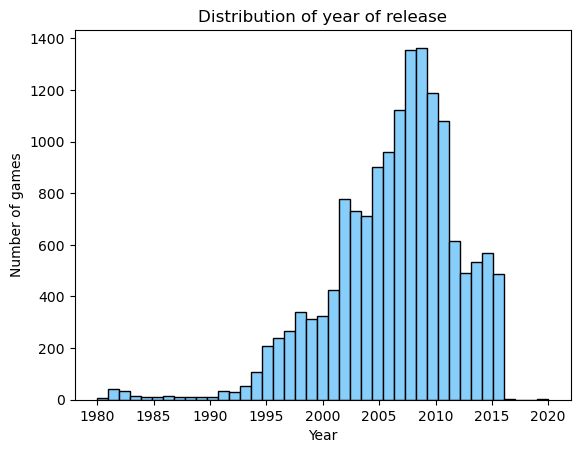

In [15]:
# Histogram plot of Year of release

plt.style.use('default')
num_years = games["Year_of_Release"].max() - games["Year_of_Release"].min() + 1
plt.hist(games["Year_of_Release"], bins=num_years, color="lightskyblue", edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year")
plt.ylabel("Number of games");

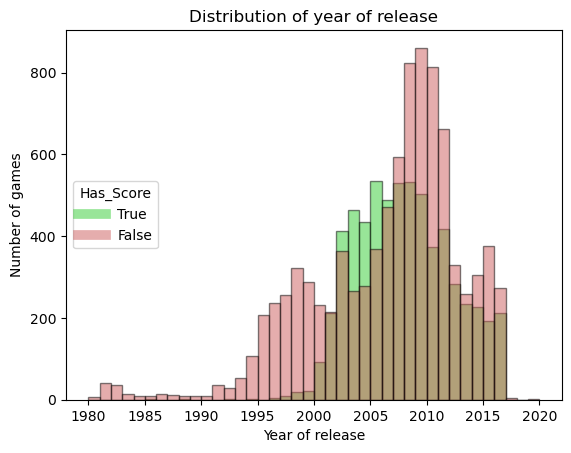

In [16]:
plt.style.use('default')

from matplotlib.lines import Line2D

plt.hist(games[games["Has_Score"]==True]["Year_of_Release"], color="limegreen", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.hist(games[games["Has_Score"]==False]["Year_of_Release"], color="indianred", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year of release")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="limegreen", lw=7, label="True", alpha=0.5),
                    Line2D([0], [0], color="indianred", lw=7, label="False", alpha=0.5)],
           title="Has_Score", loc=6);

From year 1995-2000, video games are starting to rise in popularity, but there wasn't much decicated platform or magazine to review games. 

From year 2000-2015, the total number of games released reached peak at 2010 but most of the games are not rated. Probably there were so many games published in 2010 that a lot of them remained unnoticed by the community.

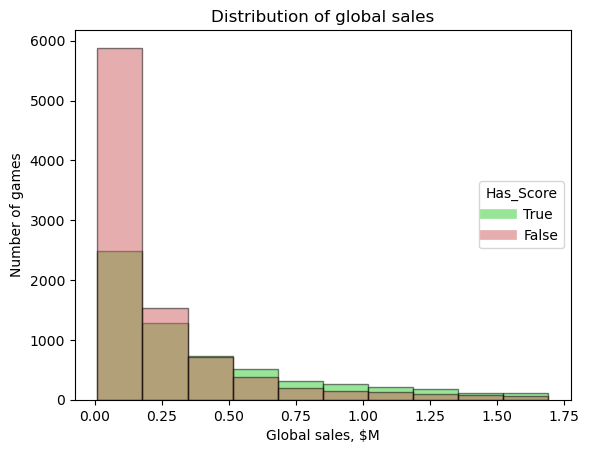

In [17]:
plt.hist(games[games["Has_Score"]==True]["Global_Sales"], color="limegreen", alpha=0.5, 
         edgecolor="black")
plt.hist(games[games["Has_Score"]==False]["Global_Sales"], color="indianred", alpha=0.5, 
         edgecolor="black")
plt.title("Distribution of global sales")
plt.xlabel("Global sales, $M")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="limegreen", lw=7, label="True", alpha=0.5),
                    Line2D([0], [0], color="indianred", lw=7, label="False", alpha=0.5)],
           title="Has_Score", loc=7);

Games without score tend to have less global sales.

## Predictive Analysis (on Global Sales)

### Basic Model

In [18]:
scored = games.dropna(subset=["User_Score", "Critic_Score", "Rating"])
scored.describe()

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000
mean,2007.422682,0.391119,68.976047,26.910706,7.139661,118.897181,10.577318
std,4.171197,0.389871,13.627623,17.416288,1.450253,424.446207,4.171197
min,1985.000000,0.010000,13.000000,3.000000,0.500000,4.000000,2.000000
25%,2004.000000,0.100000,61.000000,13.000000,6.400000,10.000000,8.000000
50%,2007.000000,0.240000,71.000000,23.000000,7.500000,23.000000,11.000000
75%,2010.000000,0.560000,79.000000,37.000000,8.200000,66.000000,14.000000
max,2016.000000,1.690000,98.000000,106.000000,9.600000,10665.000000,33.000000


In [19]:
#remove outliers in User_count column
scored, rmvd_user_count = rm_outliers(scored, ["User_Count"])
scored.describe()

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000
mean,2007.055837,0.369597,67.815866,24.958439,7.124575,37.459523,10.944163
std,4.010373,0.367824,13.408831,15.689528,1.440391,44.572477,4.010373
min,1985.000000,0.010000,13.000000,3.000000,0.500000,4.000000,2.000000
25%,2004.000000,0.100000,60.000000,13.000000,6.400000,9.000000,8.000000
50%,2007.000000,0.230000,70.000000,22.000000,7.400000,20.000000,11.000000
75%,2010.000000,0.520000,78.000000,34.000000,8.200000,45.000000,14.000000
max,2016.000000,1.690000,98.000000,91.000000,9.600000,233.000000,33.000000


Feaures will consist of numeric columns (except for sales in regions and year - using age instead) and one-hot encoded categorical columns (platform, genre, rating).

In [20]:
import category_encoders as ce
# Select the numeric columns
numeric_subset = scored.select_dtypes("number")

# Select the categorical column
categorical_subset = scored[["Platform", "Genre", "Rating"]]

# One hot encode
encoder = ce.one_hot.OneHotEncoder()
categorical_subset = encoder.fit_transform(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Find correlations with the score 
correlations = features.corr()["Global_Sales"].dropna().sort_values()

In [21]:
correlations.head(5)

Platform_5        -0.186725
Genre_10          -0.094686
Genre_12          -0.084227
Platform_17       -0.069683
Year_of_Release   -0.065124
Name: Global_Sales, dtype: float64

In [22]:
correlations.tail(5)

User_Score      0.155470
User_Count      0.252651
Critic_Score    0.281545
Critic_Count    0.292327
Global_Sales    1.000000
Name: Global_Sales, dtype: float64

From the correlation analysis, the features that has the highest correlations with global sales are critic and user scores and counts. 

We can also make use of scatterplots, histograms and kdeplots to check the correlations. 

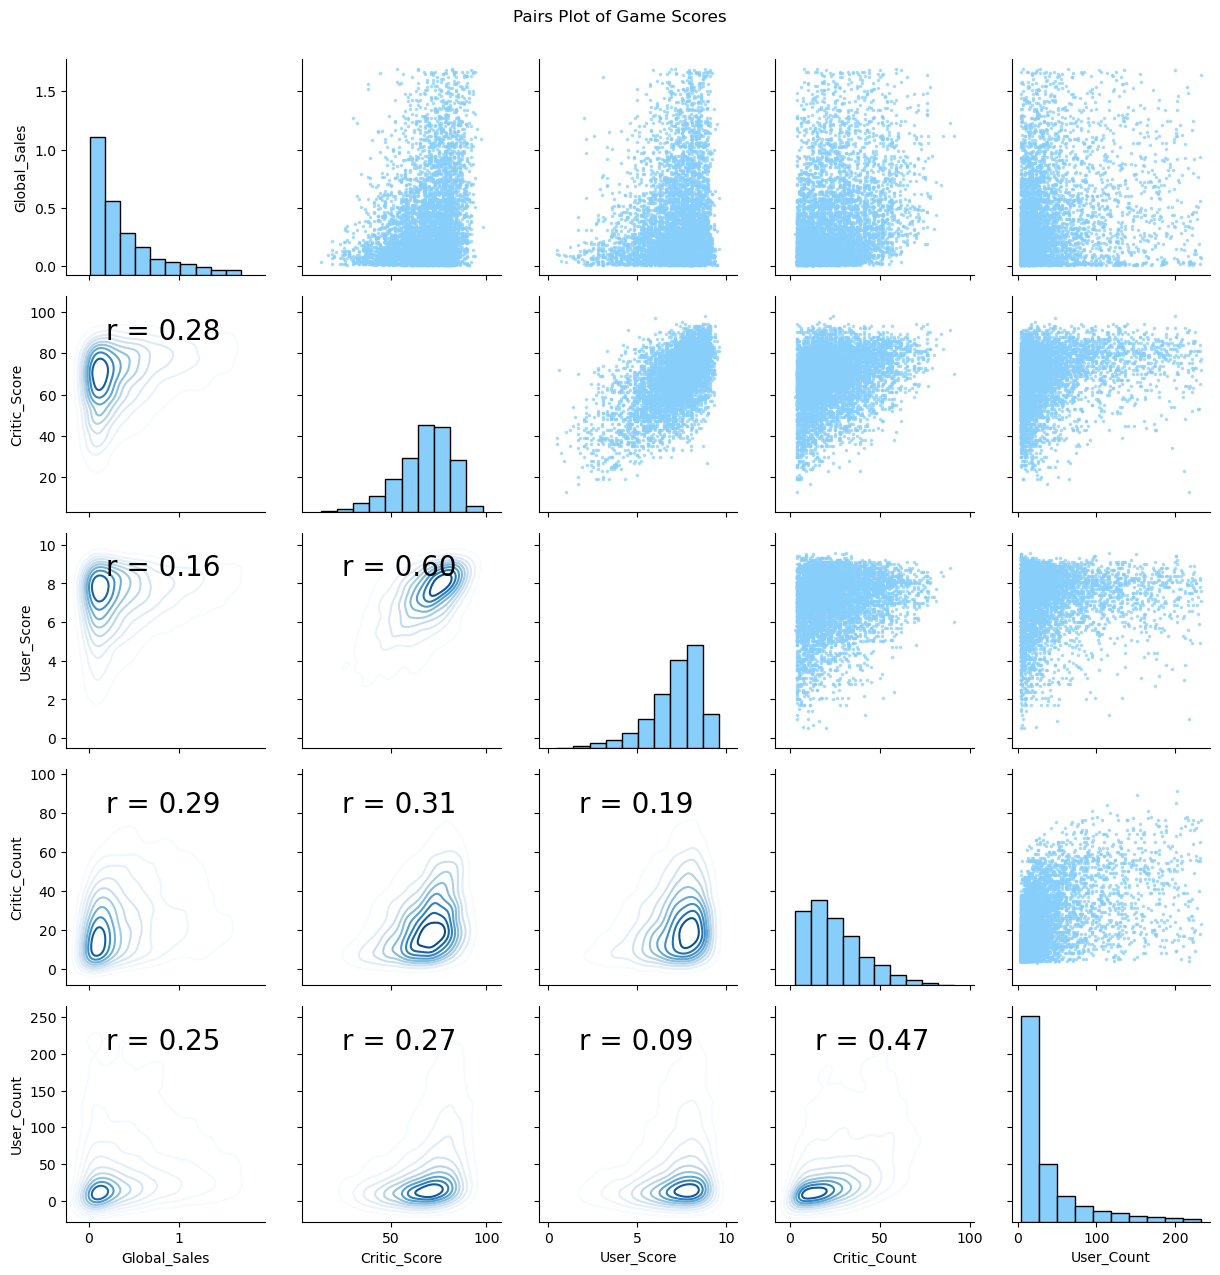

In [23]:
# Extract the columns to  plot
plot_data = features[["Global_Sales", "Critic_Score", "User_Score",
                      "Critic_Count", "User_Count"]]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)
    
# Create the pairgrid object
grid = sns.PairGrid(data = plot_data)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = "lightskyblue", alpha = 0.6, marker=".", s=10)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = "lightskyblue", edgecolor="black")

# Bottom is correlation and density plot
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Blues)

# Title for entire plot
plt.suptitle("Pairs Plot of Game Scores", y = 1.02);

#### Split Dataset

In [24]:
from sklearn.model_selection import train_test_split
basic_target = pd.Series(features["Global_Sales"])
basic_features = features.drop(columns="Global_Sales")
features_train, features_test, target_train, target_test = train_test_split(basic_features, basic_target, 
                                                                            test_size=0.2,
                                                                            random_state=42)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(4427, 40)
(1107, 40)
(4427,)
(1107,)


In [25]:
# define function to evaluate model. We will be using mean absolute error

def mae(y_true, y_pred):
    return np.average(abs(y_true - y_pred))

We will set the median value of global sales in the train dataset as baseline guess.

In [26]:
baseline_guess = np.median(target_train)
basic_baseline_mae = mae(target_test, baseline_guess)
print(f"Baseline guess for global sales is: {baseline_guess}")
print(f"Baseline Performance on the test set: MAE = {basic_baseline_mae}")

Baseline guess for global sales is: 0.23
Baseline Performance on the test set: MAE = 0.2787353206865403


Different types of regression models will be tested 

In [27]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [28]:
#define a universal function to train and evaluate model

def fit_and_evaluate(model):
    
    # Train the model
    model.fit(features_train, target_train)
    
    # Make predictions and evalute
    model_pred = model.predict(features_test)
    model_mae = mae(target_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [29]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print("Linear Regression Performance on the test set: MAE = {:.04f}".format(lr_mae))

Linear Regression Performance on the test set: MAE = 0.2365


In [30]:
svm = SVR(C = 1000, gamma=0.1)
svm_mae = fit_and_evaluate(svm)

print("Support Vector Machine Regression Performance on the test set: MAE = {:.04f}".format(svm_mae))

Support Vector Machine Regression Performance on the test set: MAE = 0.2870


In [31]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print("Random Forest Regression Performance on the test set: MAE = {:.04f}".format(random_forest_mae))

Random Forest Regression Performance on the test set: MAE = 0.2215


In [32]:
gradient_boosting = GradientBoostingRegressor(random_state=60)
gradient_boosting_mae = fit_and_evaluate(gradient_boosting)

print("Gradient Boosting Regression Performance on the test set: MAE = {:.04f}".format(gradient_boosting_mae))

Gradient Boosting Regression Performance on the test set: MAE = 0.2197


In [33]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print("K-Nearest Neighbors Regression Performance on the test set: MAE = {:.04f}".format(knn_mae))

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.2542


In [34]:
ridge = Ridge(alpha=10)
ridge_mae = fit_and_evaluate(ridge)

print("Ridge Regression Performance on the test set: MAE = {:.04f}".format(ridge_mae))

Ridge Regression Performance on the test set: MAE = 0.2354


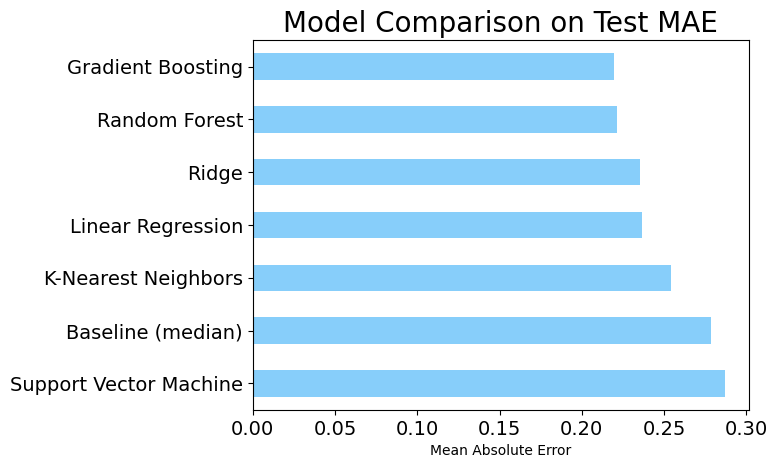

In [35]:
model_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Baseline (median)", "Ridge"],
                                 "mae": [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosting_mae, knn_mae, basic_baseline_mae, ridge_mae]})
model_comparison.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                                           color="lightskyblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);

Gradient Boosting regressor seems to be the best model.

In next section, we will doing randomized search to find the best parameters and using grid search for optimizing n_estimators. 

#### To refine the parameters